<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(0_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,81.964062,34.956728,3.997448,130.918238,127.723393,3.194844
1,0.0,1.0,92.773399,58.622957,2.544851,163.941207,161.979127,1.962080
2,0.0,2.0,48.044839,23.368620,-1.888554,79.524905,82.409164,-2.884259
3,0.0,3.0,90.765679,37.479324,-0.344564,137.900439,139.001338,-1.100899
4,0.0,4.0,61.731929,99.071335,4.408300,175.211564,171.158138,4.053426
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,39.909213,71.123441,-2.784964,118.247690,120.862052,-2.614362
19996,999.0,16.0,28.743931,99.546657,-0.215433,138.075156,138.257242,-0.182087
19997,999.0,17.0,24.350732,60.718797,2.068581,97.138110,95.356014,1.782096
19998,999.0,18.0,80.031129,87.869003,-3.529569,174.370563,176.604411,-2.233848


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    81.964062  34.956728  3.997448  130.918238  127.723393  3.194844
      1.0    92.773399  58.622957  2.544851  163.941207  161.979127  1.962080
      2.0    48.044839  23.368620 -1.888554   79.524905   82.409164 -2.884259
      3.0    90.765679  37.479324 -0.344564  137.900439  139.001338 -1.100899
      4.0    61.731929  99.071335  4.408300  175.211564  171.158138  4.053426
...                ...        ...       ...         ...         ...       ...
999.0 15.0   39.909213  71.123441 -2.784964  118.247690  120.862052 -2.614362
      16.0   28.743931  99.546657 -0.215433  138.075156  138.257242 -0.182087
      17.0   24.350732  60.718797  2.068581   97.138110   95.356014  1.782096
      18.0   80.031129  87.869003 -3.529569  174.370563  176.604411 -2.233848
      19.0   47.145654  20.991280 -0.784664   77.352270   78.045924 -0.693654

[20000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    81.964062  34.956728  3.997448  130.918238  127.723393  3.194844
      1.0    92.773399  58.622957  2.544851  163.941207  161.979127  1.962080
      2.0    48.044839  23.368620 -1.888554   79.524905   82.409164 -2.884259
      3.0    90.765679  37.479324 -0.344564  137.900439  139.001338 -1.100899
      4.0    61.731929  99.071335  4.408300  175.211564  171.158138  4.053426
...                ...        ...       ...         ...         ...       ...
999.0 15.0   39.909213  71.123441 -2.784964  118.247690  120.862052 -2.614362
      16.0   28.743931  99.546657 -0.215433  138.075156  138.257242 -0.182087
      17.0   24.350732  60.718797  2.068581   97.138110   95.356014  1.782096
      18.0   80.031129  87.869003 -3.529569  174.370563  176.604411 -2.233848
      19.0   47.145654  20.991280 -0.784664   77.352270   78.045924 -0.693654

[20000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,81.964062,34.956728,3.997448,130.918238,127.723393,3.194844
1,0.0,1.0,92.773399,58.622957,2.544851,163.941207,161.979127,1.962080
2,0.0,2.0,48.044839,23.368620,-1.888554,79.524905,82.409164,-2.884259
3,0.0,3.0,90.765679,37.479324,-0.344564,137.900439,139.001338,-1.100899
4,0.0,4.0,61.731929,99.071335,4.408300,175.211564,171.158138,4.053426
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,39.909213,71.123441,-2.784964,118.247690,120.862052,-2.614362
19996,999.0,16.0,28.743931,99.546657,-0.215433,138.075156,138.257242,-0.182087
19997,999.0,17.0,24.350732,60.718797,2.068581,97.138110,95.356014,1.782096
19998,999.0,18.0,80.031129,87.869003,-3.529569,174.370563,176.604411,-2.233848


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    81.964062  34.956728  3.997448  130.918238  127.723393  3.194844
      1.0    92.773399  58.622957  2.544851  163.941207  161.979127  1.962080
      2.0    48.044839  23.368620 -1.888554   79.524905   82.409164 -2.884259
      3.0    90.765679  37.479324 -0.344564  137.900439  139.001338 -1.100899
      4.0    61.731929  99.071335  4.408300  175.211564  171.158138  4.053426
...                ...        ...       ...         ...         ...       ...
999.0 15.0   39.909213  71.123441 -2.784964  118.247690  120.862052 -2.614362
      16.0   28.743931  99.546657 -0.215433  138.075156  138.257242 -0.182087
      17.0   24.350732  60.718797  2.068581   97.138110   95.356014  1.782096
      18.0   80.031129  87.869003 -3.529569  174.370563  176.604411 -2.233848
      19.0   47.145654  20.991280 -0.784664   77.352270   78.045924 -0.693654

[20000 rows x 6 columns]

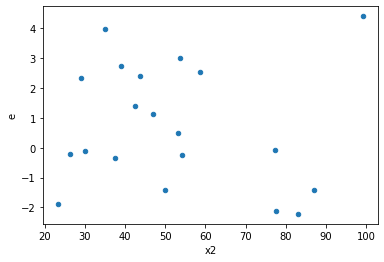

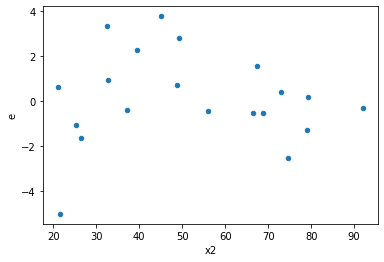

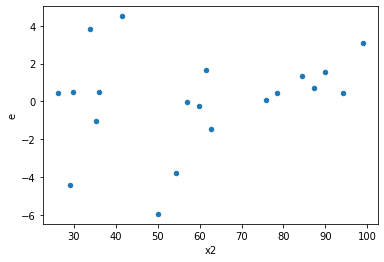

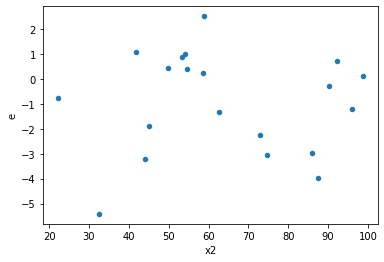

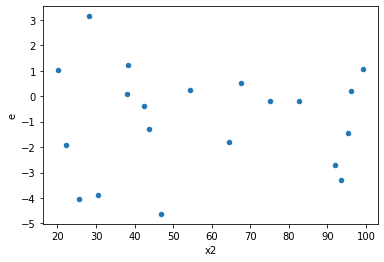

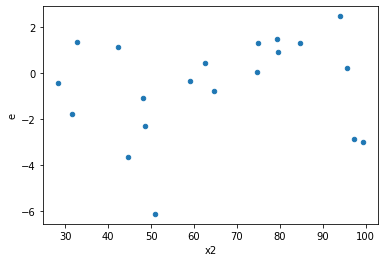

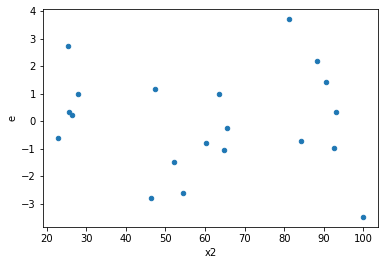

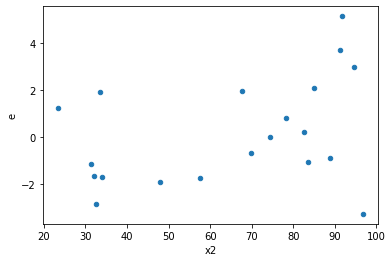

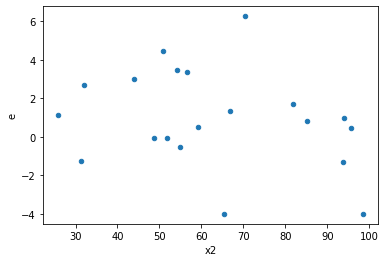

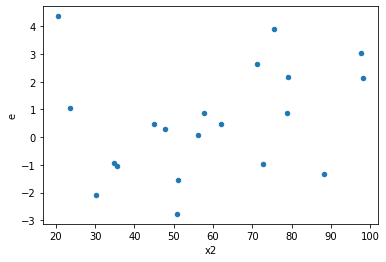

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,11.0,5.0,37.039170501625776,35.03659004025738,3.367197318329616,7.007318008051476,2.0810535723304846,0.4321940585362145,0.7839029707318927,0.21609702926810725,Reject001=1 : Homoscedasticity
4.0,4.0,12.0,10.862600412067469,63.84176538639927,2.715650103016867,5.320147115533272,1.9590694359420677,0.33038722220487204,0.834806388897564,0.16519361110243602,Reject001=1 : Homoscedasticity
9.0,5.0,11.0,2.624612048719512,53.56731005674462,0.5249224097439024,4.869755459704056,9.277095756075452,0.0022893613222152442,0.9988553193388924,0.0011446806611076221,Reject001=0 : Heteroscedasticity
12.0,9.0,7.0,20.56472134021126,31.563320468324765,2.2849690378012513,4.509045781189252,1.9733509323733136,0.3823366967308581,0.8088316516345709,0.19116834836542906,Reject001=1 : Homoscedasticity
16.0,6.0,10.0,8.385108467228118,57.67090727595019,1.397518077871353,5.767090727595019,4.126666279966292,0.04797422147667185,0.9760128892616641,0.023987110738335926,Reject001=1 : Homoscedasticity
18.0,7.0,9.0,16.9155494865023,32.98042320298459,2.416507069500329,3.6644914669982875,1.516441442795369,0.5490261163418362,0.7254869418290819,0.2745130581709181,Reject001=1 : Homoscedasticity
19.0,8.0,8.0,33.01595617829103,87.82049441870022,4.126994522286378,10.977561802337528,2.6599409674660524,0.18800173085472416,0.9059991345726379,0.09400086542736208,Reject001=1 : Homoscedasticity
20.0,4.0,12.0,2.244639504783387,32.37286667537221,0.5611598761958467,2.697738889614351,4.80743368164981,0.030220211423162446,0.9848898942884188,0.015110105711581223,Reject001=1 : Homoscedasticity
21.0,10.0,6.0,24.450224944980178,66.684896897185,2.445022494498018,11.114149482864166,4.54562258951568,0.07724575366825759,0.9613771231658712,0.038622876834128794,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,5.0,37.039170501625776,35.03659004025738,3.367197318329616,7.007318008051476,2.0810535723304846,0.4321940585362145,Reject001=1 : Homoscedasticity
1.0,11.0,5.0,63.55995799139337,11.021571316823698,5.778177999217579,2.2043142633647395,0.3814895047648627,0.16990069695321836,Reject001=1 : Homoscedasticity
2.0,8.0,8.0,50.58792946019446,37.035622198480986,6.323491182524307,4.629452774810123,0.7321039345487105,0.669647839367791,Reject001=1 : Homoscedasticity
3.0,9.0,7.0,38.289786974746825,26.227497558830517,4.254420774971869,3.746785365547217,0.8806804883026623,0.8388731350760313,Reject001=1 : Homoscedasticity
4.0,4.0,12.0,10.862600412067469,63.84176538639927,2.715650103016867,5.320147115533272,1.9590694359420677,0.33038722220487204,Reject001=1 : Homoscedasticity
5.0,13.0,3.0,59.17522623876027,4.781825411806496,4.551940479904636,1.5939418039354987,0.35016754084818175,0.1560201439705662,Reject001=1 : Homoscedasticity
6.0,13.0,3.0,45.41590445746101,2.486707370171483,3.4935311121123855,0.8289024567238276,0.2372678044428883,0.05492746184554463,Reject001=1 : Homoscedasticity
7.0,11.0,5.0,61.61201932322356,16.636119069206654,5.601092665747596,3.327223813841331,0.5940312029094479,0.43784205897820067,Reject001=1 : Homoscedasticity
8.0,11.0,5.0,58.788947226856955,7.754119128119315,5.344449747896086,1.5508238256238631,0.2901746482384581,0.08121134596416871,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      933
Reject001=0 : Heteroscedasticity     67
Name: Result_test, dtype: int64